In [1]:
from notebooks.util.distribution_utils import *

from liquidity.response_functions.features import add_aggregate_features
from hurst_exponent.util.utils import augmented_dickey_fuller

In [2]:
# Automatically reload changes in package dependencies
%load_ext autoreload
%autoreload 2

In [3]:
# Number of events to use
EVENTS_RANGE = 500000

# Bin/window size for computing events
T = 1000

## Load limit orders raw sample data

In [4]:
# Load raw sample data  from CSV
stocks = ['TSLA', 'AMZN', 'NFLX', 'MSFT', 'EBAY', 'APPL']

current_dir = os.path.abspath('.')
root_dir = os.path.join(current_dir, '..', '..')
data_dir = os.path.join(root_dir, 'data', 'limit_orders')

stock_dfs = {}

# Loop through each stock
for stock in stocks:

    filename = f"{stock}-2016-R1-LO.csv"

    stock_file_path = os.path.join(data_dir, filename)

    # Read the CSV and store in the dictionary
    stock_dfs[stock] = pd.read_csv(stock_file_path)

# Access the dataframe using stock's ticker as key
tsla_raw_df = stock_dfs['TSLA']
amzn_raw_df = stock_dfs['AMZN']
nflx_raw_df = stock_dfs['NFLX']
msft_raw_df = stock_dfs['MSFT']
ebay_raw_df = stock_dfs['EBAY']
appl_raw_df = stock_dfs['APPL']

In [5]:
tsla_raw_df

,Unnamed: 0,event_timestamp,side,lob_action,price,size,old_size,best_ask_price,best_ask_size,best_bid_price,best_bid_size,is_new_best_price,is_new_best_size,price_level,old_price_level,midprice,sign,midprice_change,R1_LO,norm_size
0,43258,2016-01-05 10:30:00.384537982,ASK,INSERT,222.61,100,0,222.94,100.0,222.38,200.0,True,False,1,0,222.660,1,-0.165,-0.165,0.990383
1,43262,2016-01-05 10:30:00.833252732,BID,INSERT,222.49,100,0,222.61,100.0,222.38,100.0,True,False,1,0,222.495,-1,0.055,-0.055,1.036284
2,43267,2016-01-05 10:30:00.835711088,BID,INSERT,222.49,100,0,222.61,100.0,222.49,100.0,False,True,1,1,222.550,-1,0.000,-0.000,1.036284
3,43271,2016-01-05 10:30:00.889596297,BID,INSERT,222.50,100,0,222.61,100.0,222.49,200.0,True,True,1,0,222.550,-1,0.210,-0.210,1.036284
4,43276,2016-01-05 10:30:01.171678818,BID,INSERT,222.51,100,0,223.02,100.0,222.50,100.0,True,False,1,0,222.760,-1,0.005,-0.005,1.036284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539714,224203,2016-12-29 14:59:39.927858544,ASK,INSERT,214.81,100,0,214.82,100.0,214.72,100.0,True,False,1,0,214.770,1,-0.005,-0.005,0.990383
2539715,224205,2016-12-29 14:59:39.929190848,ASK,INSERT,214.80,100,0,214.81,100.0,214.72,100.0,True,False,1,0,214.765,1,-0.005,-0.005,0.990383
2539716,224210,2016-12-29 14:59:39.931024014,ASK,INSERT,214.80,159,0,214.80,100.0,214.72,100.0,False,True,1,1,214.760,1,0.000,0.000,1.574709
2539717,224211,2016-12-29 14:59:39.994907085,ASK,INSERT,214.80,1,0,214.80,259.0,214.72,100.0,False,True,1,1,214.760,1,-0.025,-0.025,0.009904


## 1. Orderflow

### 1.1. Size/ Volume

In [6]:
# Order size/ volume
size_volume = {'TSLA': tsla_raw_df['norm_size'],
               'MSFT': amzn_raw_df['norm_size'],
               'AMZN': nflx_raw_df['norm_size'],
               'NFLX': msft_raw_df['norm_size'],
               'EBAY': ebay_raw_df['norm_size'],
               'APPL': appl_raw_df['norm_size'],
               }
# Update the dictionary to only keep the first EVENTS_RANGE items
#size_volume = {stock: data.head(EVENTS_RANGE) for stock, data in size_volume.items()}

#### Stationarity Test

In [7]:
# ADF test
for stock, data in size_volume.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -42.38
p-value: 0.00,
N: 499899, 
critical values: {'1%': -3.4303630813095825, '5%': -2.8615457817848604, '10%': -2.5667730774328796}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -26.70
p-value: 0.00,
N: 499898, 
critical values: {'1%': -3.4303630813357504, '5%': -2.8615457817964263, '10%': -2.566773077439036}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -127.06
p-value: 0.00,
N: 499972, 
critical values: {'1%': -3.4303630793995947, '5%': -2.8615457809406704, '10%': -2.5667730769835475}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -42.59
p-value: 0.00,
N: 499898, 
critical values: {'1%': -3.4303630813357504, '5%': -2.8615457817964263, '10%': -2.566773077439036}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.

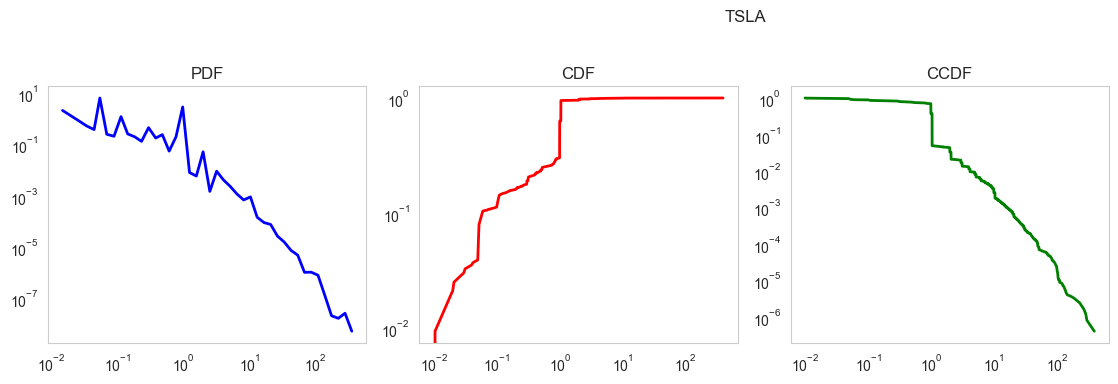

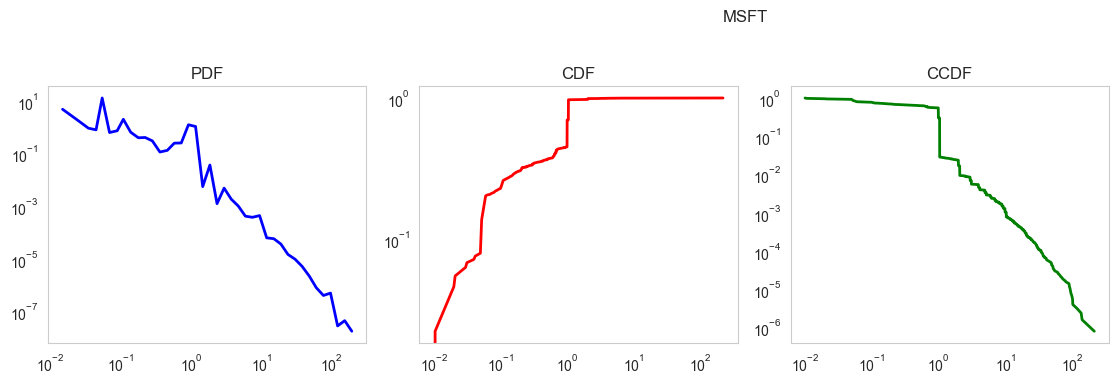

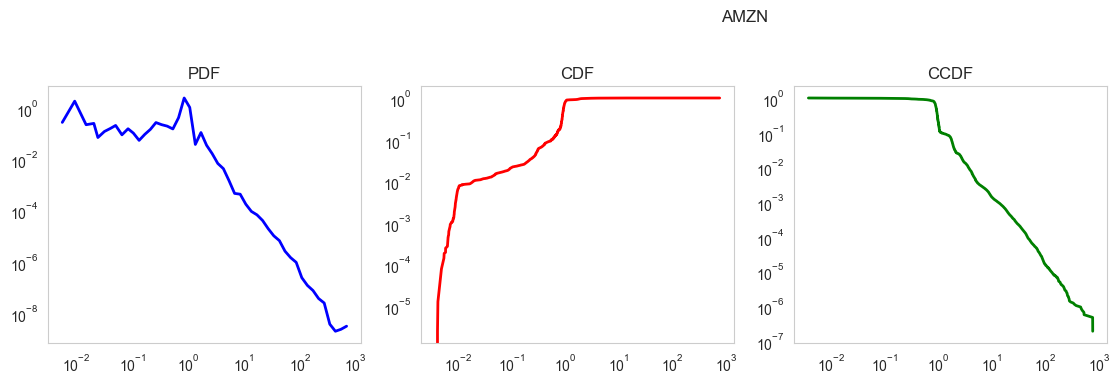

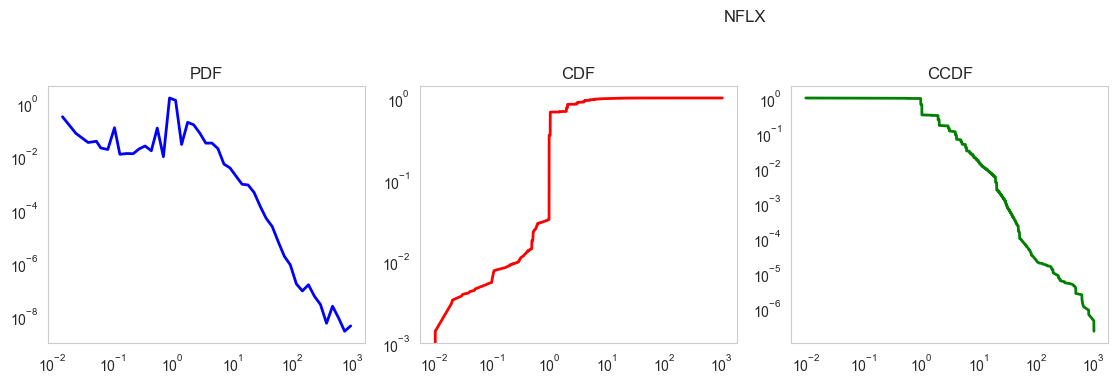

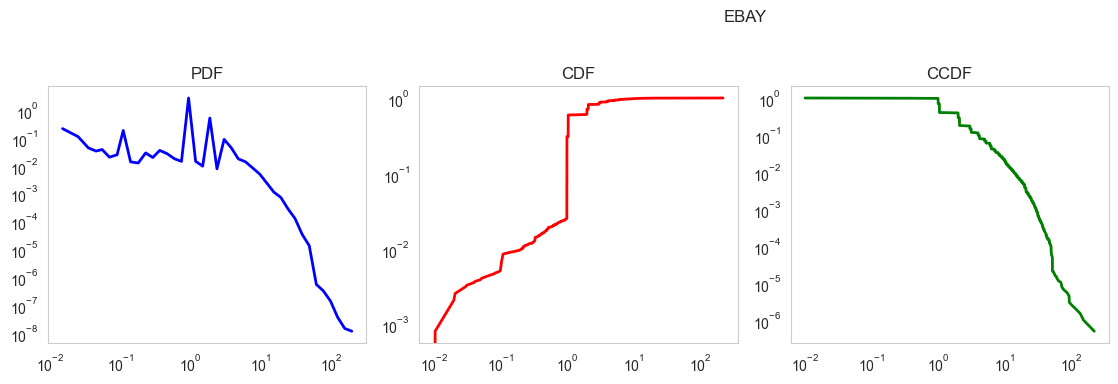

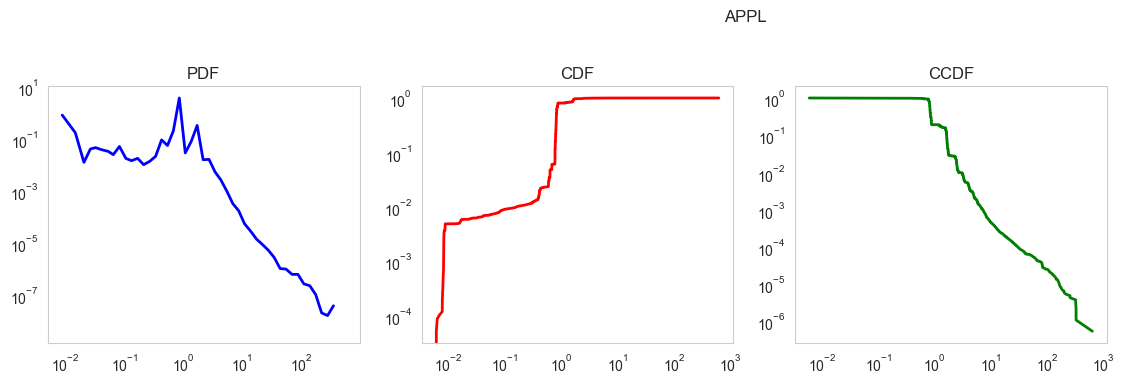

In [8]:
# Plot distribution of size_volume for each stock
for stock_name, data in size_volume.items():
    plot_distributions(stock_name, data)

### 1.2. Fit power law distribution

In [9]:
# 1. Fit Powerlaw and retrieve fitted object/ results
size_volume_data = os.path.join(root_dir, 'data', 'generated', 'lo_data', 'distributions', 'lo_size_volume_distributions.pkl')

# If the file doesn't exist, fit the series and save the results.
if not os.path.exists(size_volume_data):
    volume_fit_objects = fit_powerlaw(data_dict=size_volume, filename=size_volume_data)
else:
    volume_fit_objects = load_fit_objects(size_volume_data)

volume_fit_objects

{'TSLA': <powerlaw.Fit at 0x2a079c390>,
 'MSFT': <powerlaw.Fit at 0x2a08007d0>,
 'AMZN': <powerlaw.Fit at 0x2a052c490>,
 'NFLX': <powerlaw.Fit at 0x2a0546bd0>,
 'EBAY': <powerlaw.Fit at 0x2a04c8b50>,
 'APPL': <powerlaw.Fit at 0x2a043d950>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


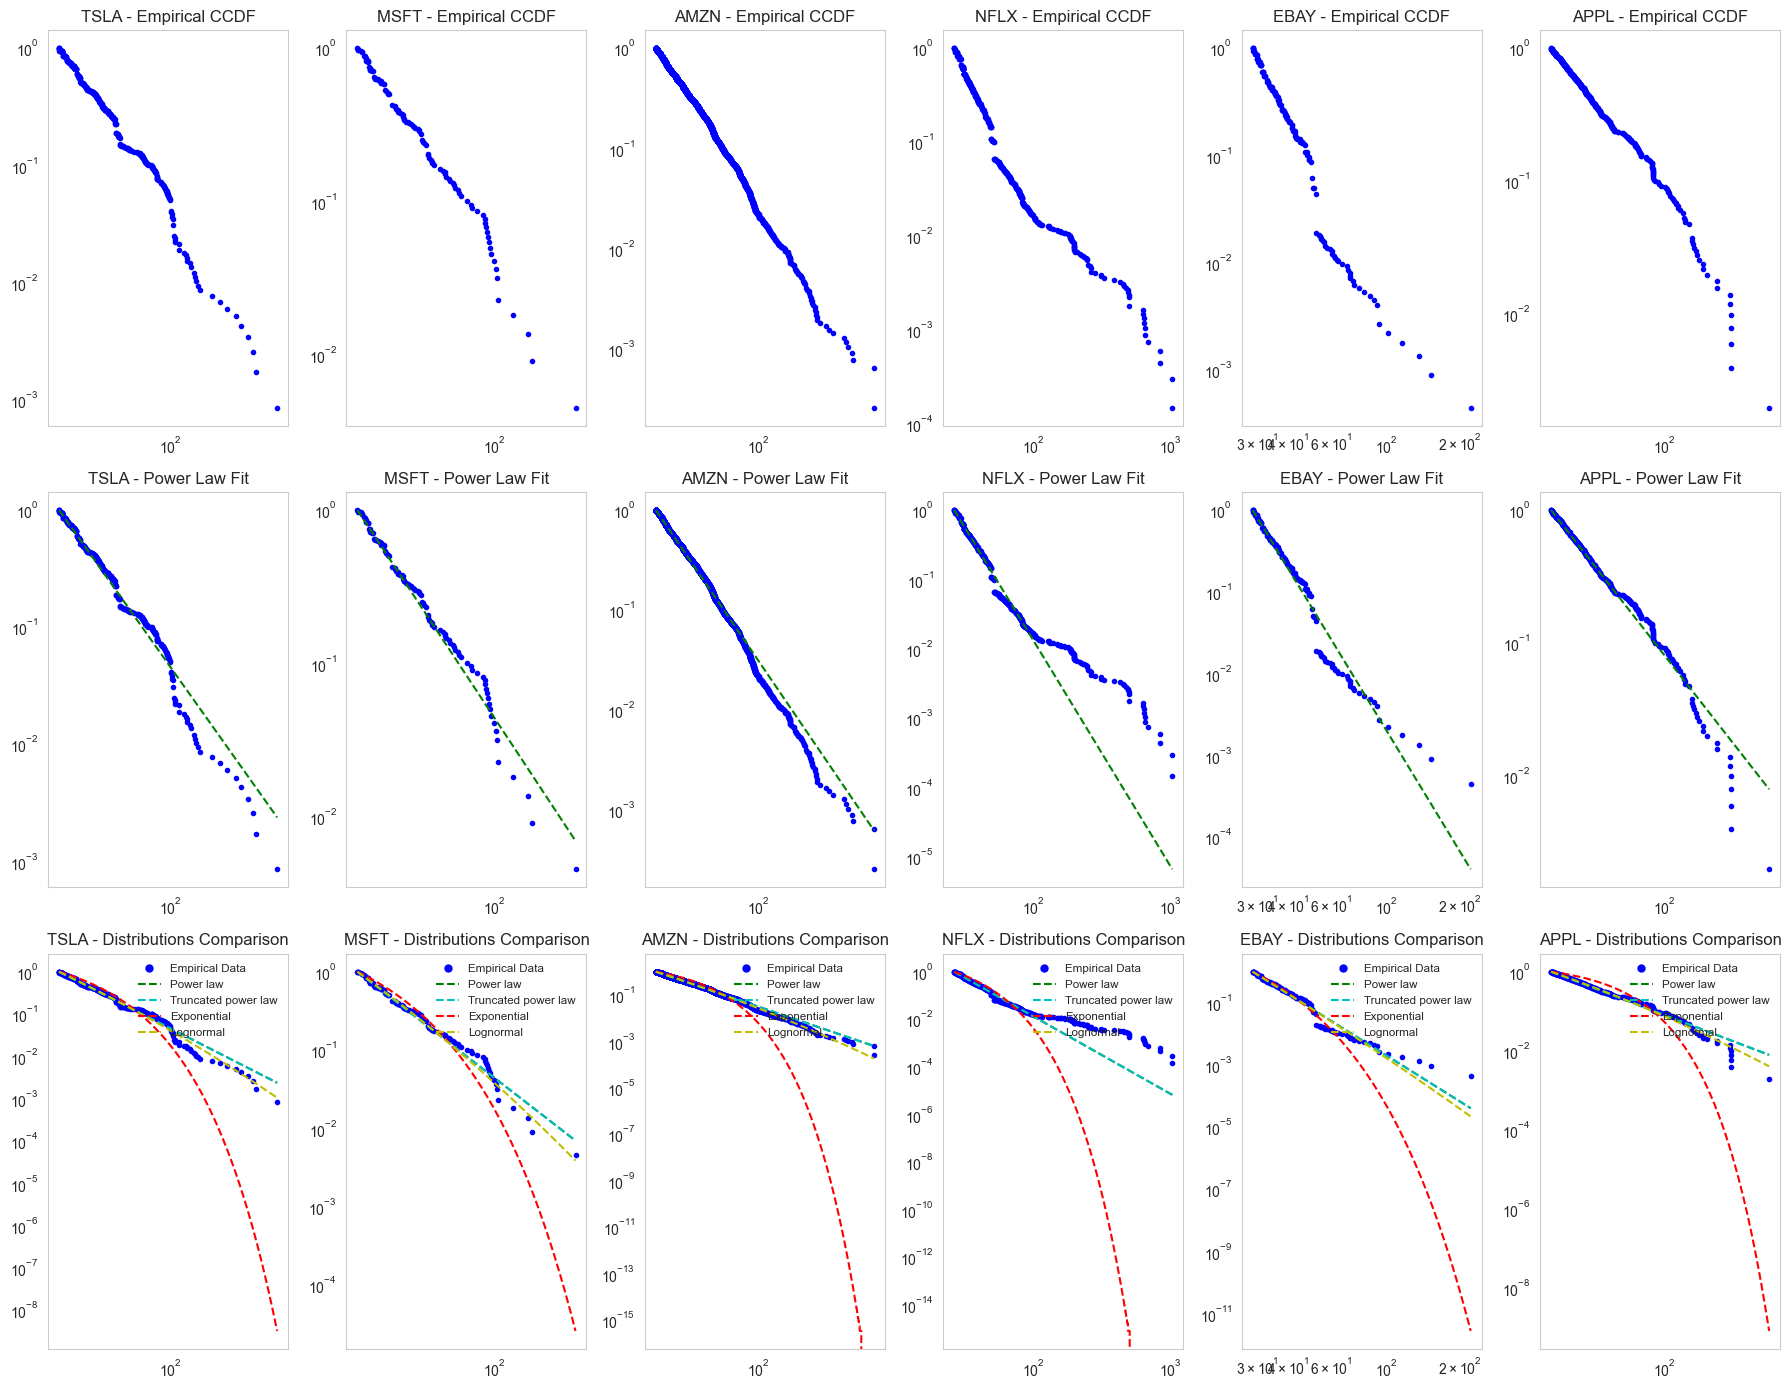

In [10]:
# Plot fitted objects
plot_fit_objects(volume_fit_objects)

#### 1.2.1 Retrieve Power law fitting results

In [11]:
# Get fitting parameters for specific distribution across all stocks
volume_fit_results = get_fitting_params(volume_fit_objects, 'power_law')
print(volume_fit_results)

  Stock Distribution     alpha       xmin  KS Distance
0  TSLA    power_law  3.150897  23.730901     0.045213
1  MSFT    power_law  3.367318  26.740338     0.046455
2  AMZN    power_law  2.920090  16.448471     0.021207
3  NFLX    power_law  4.267723  26.641300     0.062302
4  EBAY    power_law  5.946980  28.632524     0.047029
5  APPL    power_law  2.262399  13.594633     0.035025


In [12]:
# Average Alpha exponents across stocks
min_alpha = volume_fit_results['alpha'].min()
max_alpha = volume_fit_results['alpha'].max()
avg_alpha = volume_fit_results['alpha'].mean()
std_dev_alpha = volume_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 2.262399194723541
Max Alpha: 5.946979554099472
Average Alpha: 3.6525676778682783
std_dev_alpha: 1.2996057349826984


#### 1.2.2. Compare alternative distributions

In [13]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
volume_comparison = distribution_compare(volume_fit_objects, 'exponential')
display(volume_comparison)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,0.052801,23.730901,3.150897,0.045213,0.163921,4.201805,2.647955e-05
1,MSFT,exponential,0.055292,26.740338,3.367318,0.046455,0.130407,1.796181,7.246573e-02
2,AMZN,exponential,0.061053,16.448471,2.920090,0.021207,0.144614,9.245161,2.348876e-20
3,NFLX,exponential,0.074452,26.641300,4.267723,0.062302,0.177277,8.007796,1.167823e-15
4,EBAY,exponential,0.138282,28.632524,5.946980,0.047029,0.096986,2.299230,2.149189e-02
5,APPL,exponential,0.033888,13.594633,2.262399,0.035025,0.218670,5.210147,1.886910e-07


## 2. Signed Ordeflow Imbalance

In [14]:
# Aggregate orderflow
tsla_aggregate_orderflow = add_aggregate_features(tsla_raw_df, [T], remove_outliers=False)
msft_aggregate_orderflow = add_aggregate_features(msft_raw_df, [T], remove_outliers=False)
amzn_aggregate_orderflow = add_aggregate_features(amzn_raw_df, [T], remove_outliers=False)
nflx_aggregate_orderflow = add_aggregate_features(nflx_raw_df, [T],remove_outliers=False)
ebay_aggregate_orderflow = add_aggregate_features(ebay_raw_df, [T], remove_outliers=False)
appl_aggregate_orderflow = add_aggregate_features(appl_raw_df, [T],remove_outliers=False)

# Order Sign imbalance
sign_imbalance = {
  'TSLA': tsla_aggregate_orderflow['sign_imbalance'],
  'MSFT': msft_aggregate_orderflow['sign_imbalance'],
  'AMZN': amzn_aggregate_orderflow['sign_imbalance'],
  'NFLX': nflx_aggregate_orderflow['sign_imbalance'],
  'EBAY': ebay_aggregate_orderflow['sign_imbalance'],
  'APPL': appl_aggregate_orderflow['sign_imbalance']
}
# Update the dictionary to only keep the first EVENTS_RANGE items
#sign_imbalance = {stock: data.head(EVENTS_RANGE) for stock, data in sign_imbalance.items()}


# Sign Volume Imbalance
volume_imbalance = {
 'TSLA': tsla_aggregate_orderflow['vol_imbalance'],
 'MSFT': msft_aggregate_orderflow['vol_imbalance'],
 'AMZN': amzn_aggregate_orderflow['vol_imbalance'],
 'NFLX': nflx_aggregate_orderflow['vol_imbalance'],
 'EBAY': ebay_aggregate_orderflow['vol_imbalance'],
 'APPL': appl_aggregate_orderflow['vol_imbalance']
}
#volume_imbalance = {stock: data.head(EVENTS_RANGE) for stock, data in volume_imbalance.items()}

### Stationarity Tests

In [15]:
# sign_imbalance ADF test
print('Order-sign Imbalance')
for stock, data in sign_imbalance.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)
print('\n')


Order-sign Imbalance
TSLA
ADF: -15.20
p-value: 0.00,
N: 2536, 
critical values: {'1%': -3.432931203247706, '5%': -2.8626803690000653, '10%': -2.5673770613761207}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -13.12
p-value: 0.00,
N: 4565, 
critical values: {'1%': -3.4317832926440612, '5%': -2.8621733470784583, '10%': -2.56710713369859}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -12.87
p-value: 0.00,
N: 1297, 
critical values: {'1%': -3.435401880796999, '5%': -2.863770985550096, '10%': -2.567957791647768}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -12.04
p-value: 0.00,
N: 10722, 
critical values: {'1%': -3.430960041620694, '5%': -2.8618096041071914, '10%': -2.5669135051282135}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be sta

In [16]:
# volume_imbalance ADF test
print('Signed-volume Imbalance')
for stock, data in volume_imbalance.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

Signed-volume Imbalance
TSLA
ADF: -16.01
p-value: 0.00,
N: 2536, 
critical values: {'1%': -3.432931203247706, '5%': -2.8626803690000653, '10%': -2.5673770613761207}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -12.56
p-value: 0.00,
N: 4565, 
critical values: {'1%': -3.4317832926440612, '5%': -2.8621733470784583, '10%': -2.56710713369859}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -12.53
p-value: 0.00,
N: 1296, 
critical values: {'1%': -3.435405786614854, '5%': -2.86377270896149, '10%': -2.567958709443111}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -11.72
p-value: 0.00,
N: 10719, 
critical values: {'1%': -3.430960212398137, '5%': -2.8618096795734695, '10%': -2.5669135452988177}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be s

### 2.1. Order Sign Imbalance

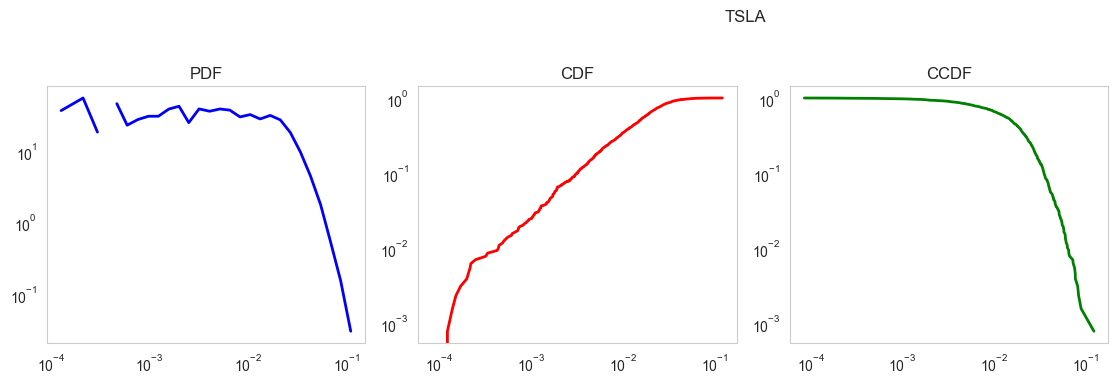

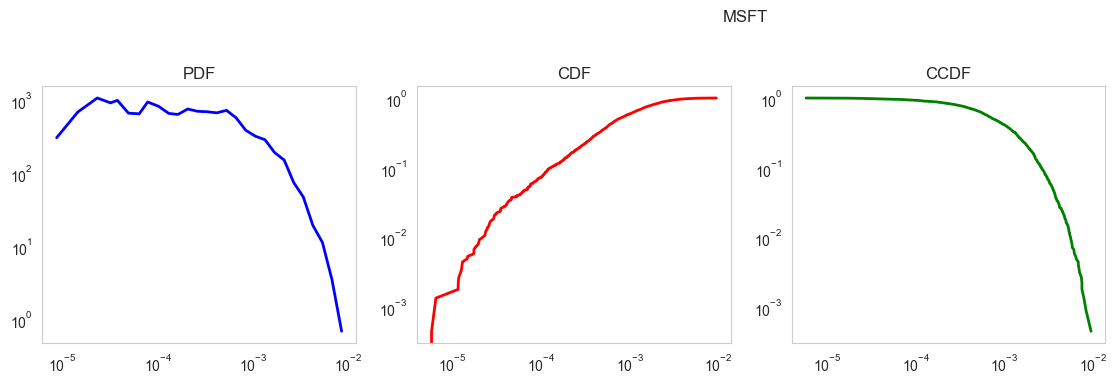

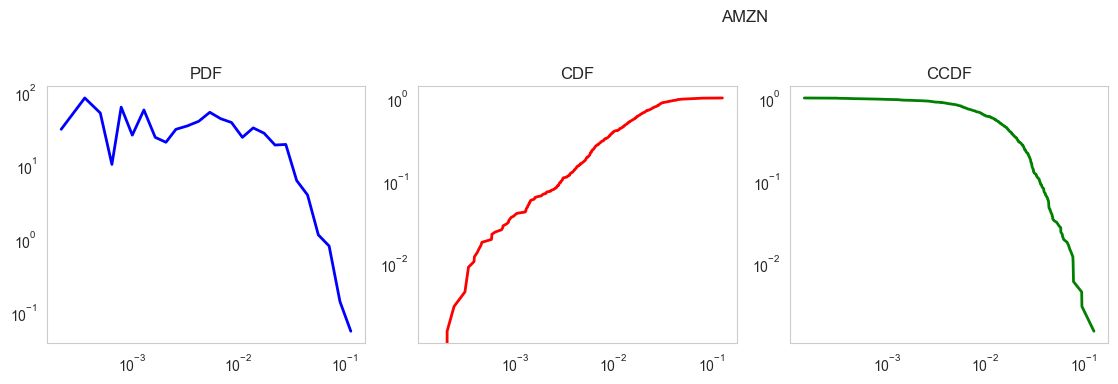

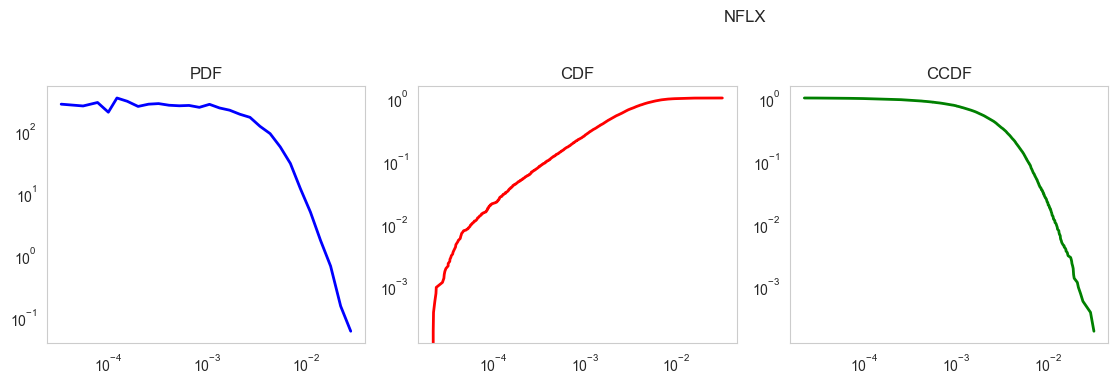

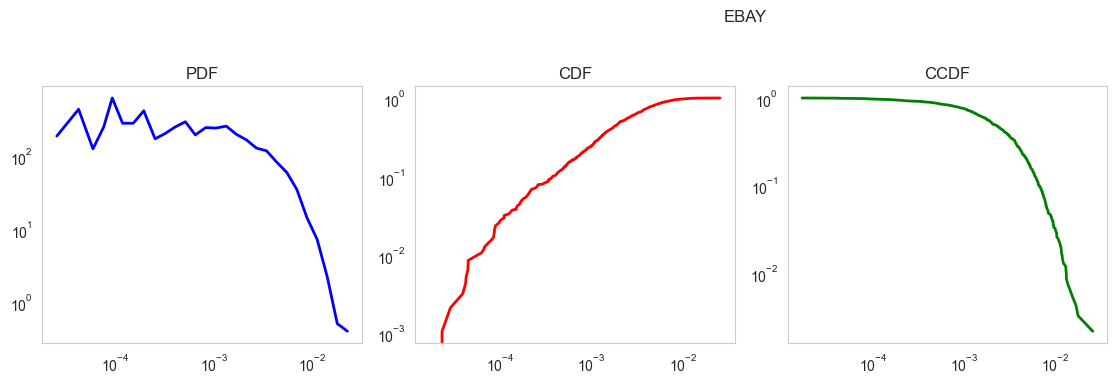

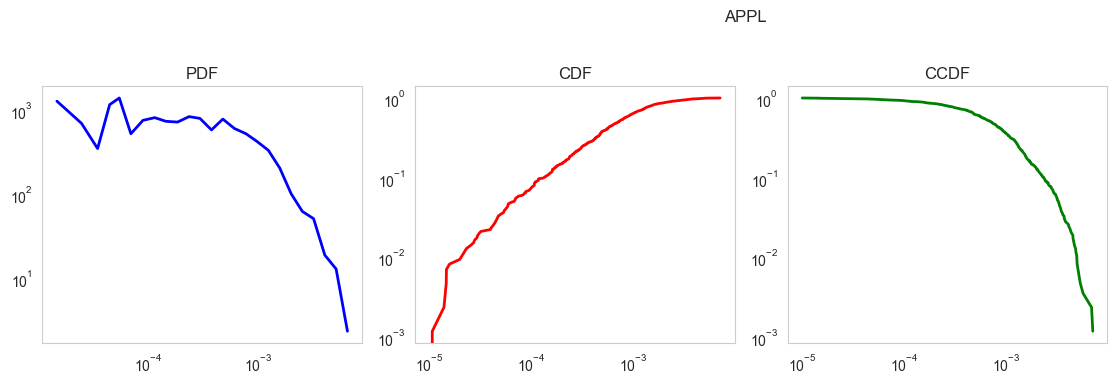

In [17]:
# Plot distribution of sign_imbalance for each stock
for stock_name, data in sign_imbalance.items():
    plot_distributions(stock_name, data)

#### 2.1.1. Fit power law distribution

In [18]:
# 1. Fit Powerlaw and retrieve fitted object/ results
sign_imbalance_data = os.path.join(root_dir, 'data', 'generated', 'lo_data', 'distributions', 'lo_sign_imbalance_distributions.pkl')

# If the file doesn't exist, fit the series and save the results.
if not os.path.exists(sign_imbalance_data):
    sign_imbalance_fit_objects = fit_powerlaw(data_dict=sign_imbalance, filename=sign_imbalance_data)
else:
    sign_imbalance_fit_objects = load_fit_objects(sign_imbalance_data)

sign_imbalance_fit_objects

{'TSLA': <powerlaw.Fit at 0x32eff9490>,
 'MSFT': <powerlaw.Fit at 0x2a07d3d10>,
 'AMZN': <powerlaw.Fit at 0x17dba7050>,
 'NFLX': <powerlaw.Fit at 0x2a0175790>,
 'EBAY': <powerlaw.Fit at 0x2a0176090>,
 'APPL': <powerlaw.Fit at 0x2a0176010>}

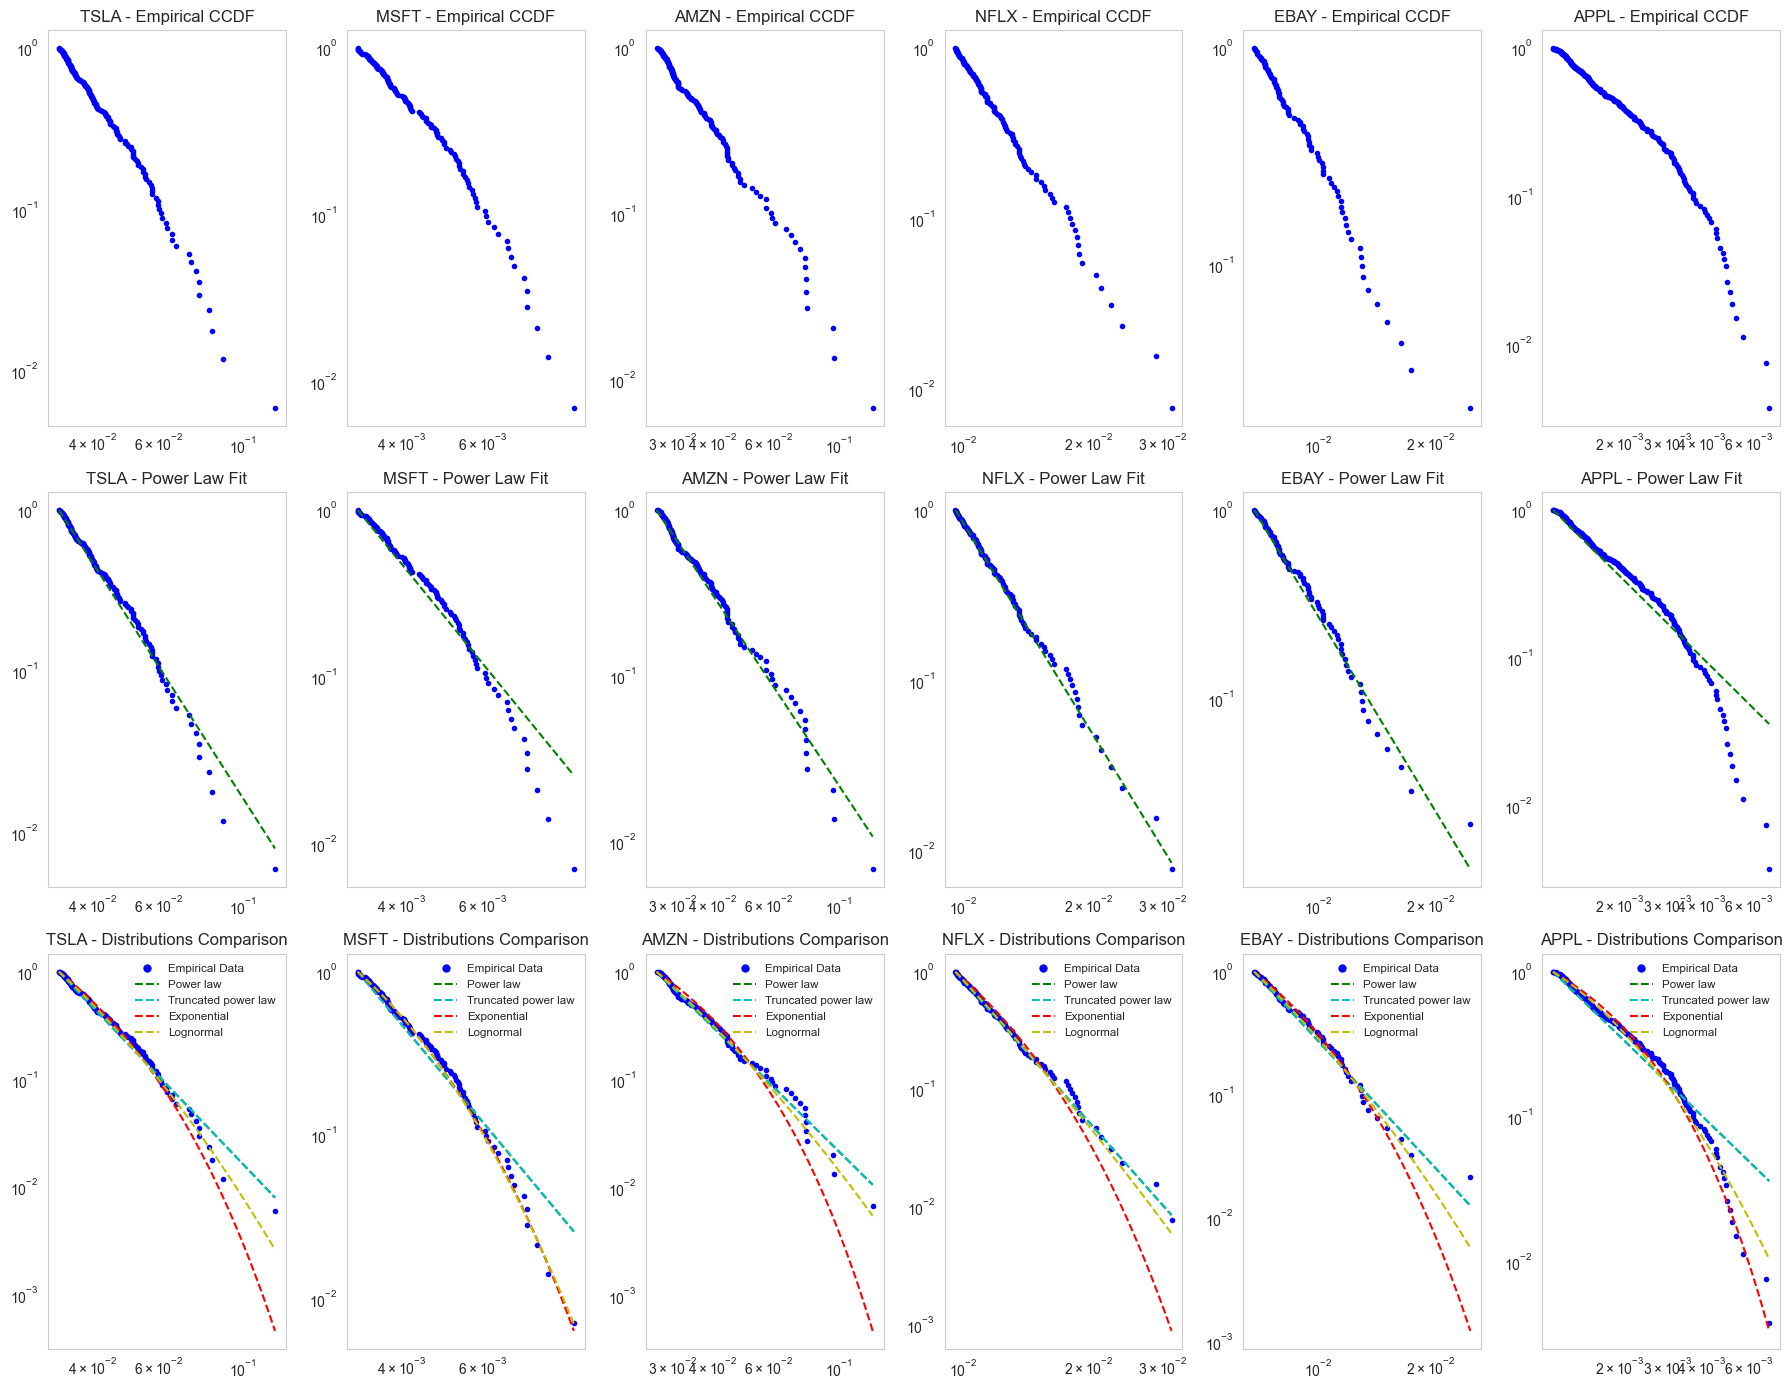

In [19]:
# Plot fitted objects
plot_fit_objects(sign_imbalance_fit_objects)

#### 2.1.2. Retrieve Power law fitting results

In [20]:
# Get fitting parameters for specific distribution across all stocks
sign_imbalance_fit_results = get_fitting_params(sign_imbalance_fit_objects, 'power_law')
print(sign_imbalance_fit_results)

  Stock Distribution     alpha      xmin  KS Distance
0  TSLA    power_law  4.636877  0.032399     0.042316
1  MSFT    power_law  4.386945  0.003203     0.064924
2  AMZN    power_law  3.885093  0.026622     0.050230
3  NFLX    power_law  4.993974  0.009572     0.030910
4  EBAY    power_law  4.282440  0.006737     0.060555
5  APPL    power_law  2.813613  0.001135     0.063412


In [21]:
# Average Alpha exponents across stocks
min_alpha = sign_imbalance_fit_results['alpha'].min()
max_alpha = sign_imbalance_fit_results['alpha'].max()
avg_alpha = sign_imbalance_fit_results['alpha'].mean()
std_dev_alpha = sign_imbalance_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 2.8136132261503333
Max Alpha: 4.99397417859314
Average Alpha: 4.166490505849777
std_dev_alpha: 0.7586169268957244


#### 2.1.3. Compare alternative distributions

In [22]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
sign_imbalance_comparison = distribution_compare(sign_imbalance_fit_objects, 'exponential')
display(sign_imbalance_comparison)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,85.403632,0.032399,4.636877,0.042316,0.070173,-0.094582,0.924647
1,MSFT,exponential,810.889366,0.003203,4.386945,0.064924,0.038783,-2.105062,0.035286
2,AMZN,exponential,75.229677,0.026622,3.885093,0.050230,0.125968,0.819574,0.412459
3,NFLX,exponential,319.815359,0.009572,4.993974,0.030910,0.069297,0.816850,0.414014
4,EBAY,exponential,356.696174,0.006737,4.282440,0.060555,0.078928,0.254405,0.799183
5,APPL,exponential,956.361934,0.001135,2.813613,0.063412,0.080710,-2.038891,0.041461


### 2.2. Volume Imbalance

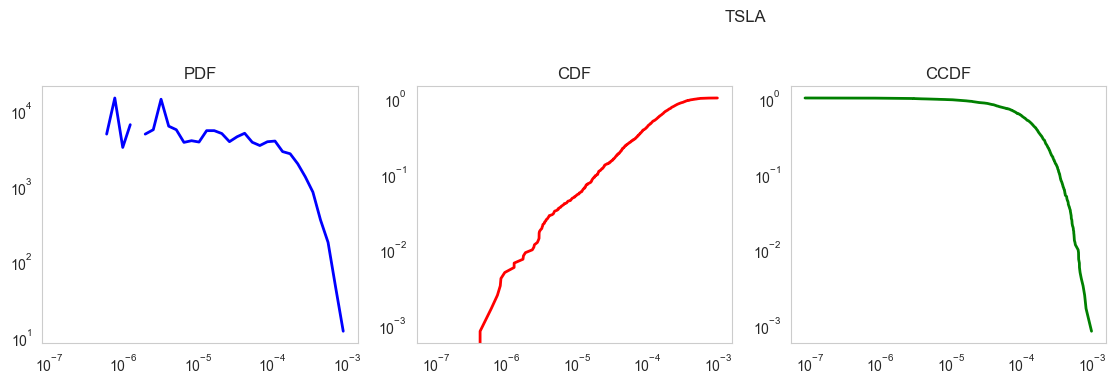

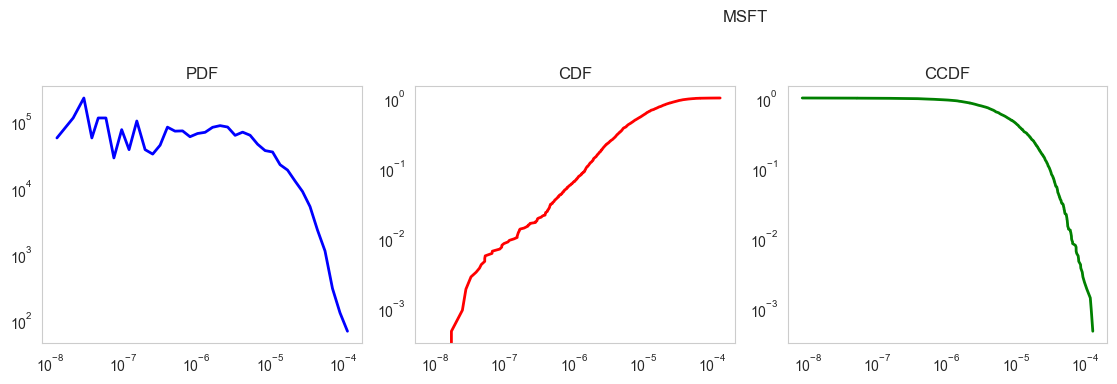

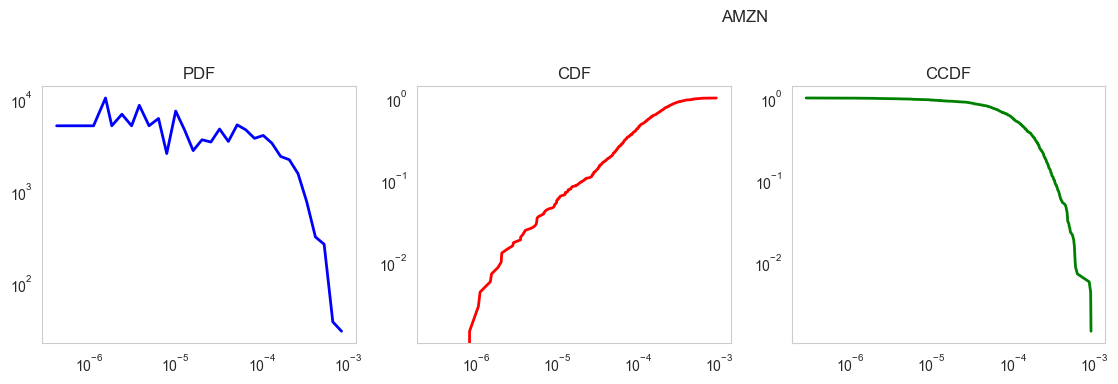

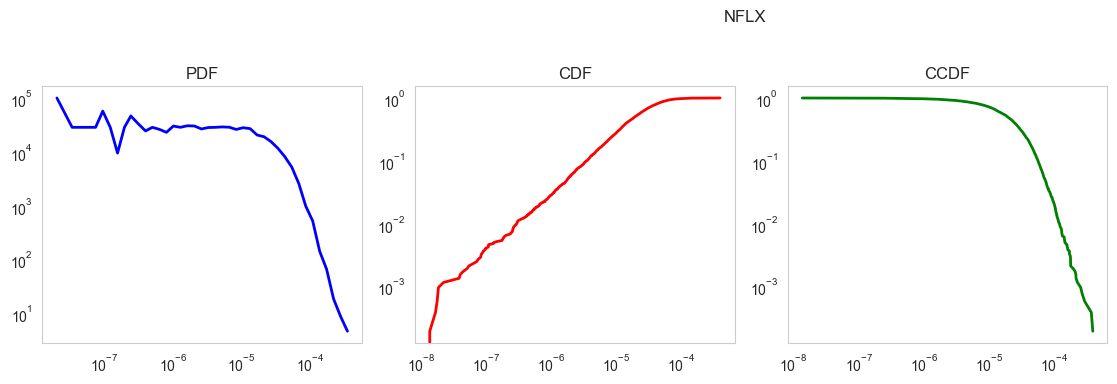

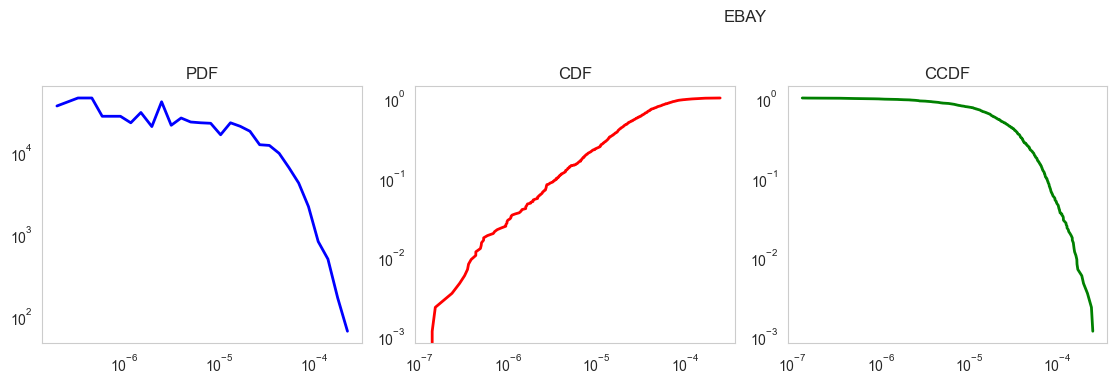

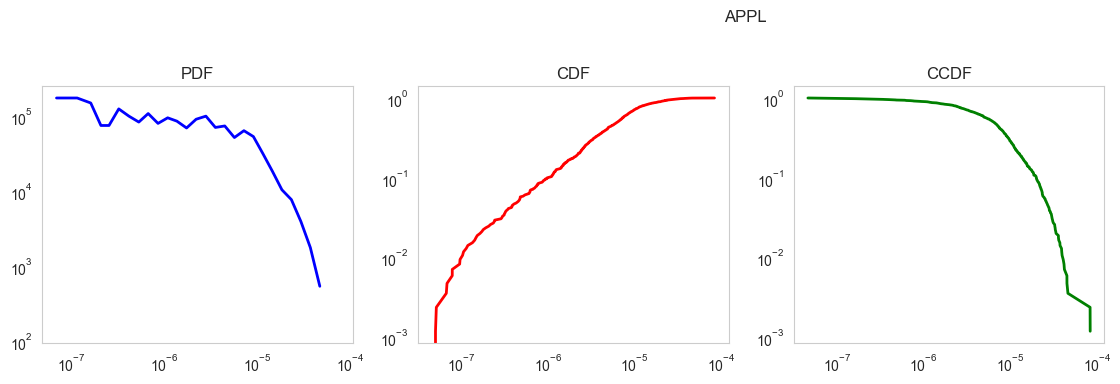

In [23]:
# Plot distribution of volume_imbalance for each stock
for stock_name, data in volume_imbalance.items():
    plot_distributions(stock_name, data)

#### 2.2.1. Fit power law distribution

In [24]:
# 1. Fit Powerlaw and retrieve fitted object/ results
volume_imbalance_data = os.path.join(root_dir, 'data', 'generated', 'lo_data', 'distributions', 'lo_volume_imbalance_distributions.pkl')

# If the file doesn't exist, fit the series and save the results.
if not os.path.exists(volume_imbalance_data):
    volume_imbalance_data_fit_objects = fit_powerlaw(data_dict=volume_imbalance, filename=volume_imbalance_data)
else:
    volume_imbalance_data_fit_objects = load_fit_objects(volume_imbalance_data)

volume_imbalance_data_fit_objects

{'TSLA': <powerlaw.Fit at 0x2c2b56810>,
 'MSFT': <powerlaw.Fit at 0x32ece24d0>,
 'AMZN': <powerlaw.Fit at 0x2b6a6c4d0>,
 'NFLX': <powerlaw.Fit at 0x32efca2d0>,
 'EBAY': <powerlaw.Fit at 0x2c2ad07d0>,
 'APPL': <powerlaw.Fit at 0x4900ada10>}

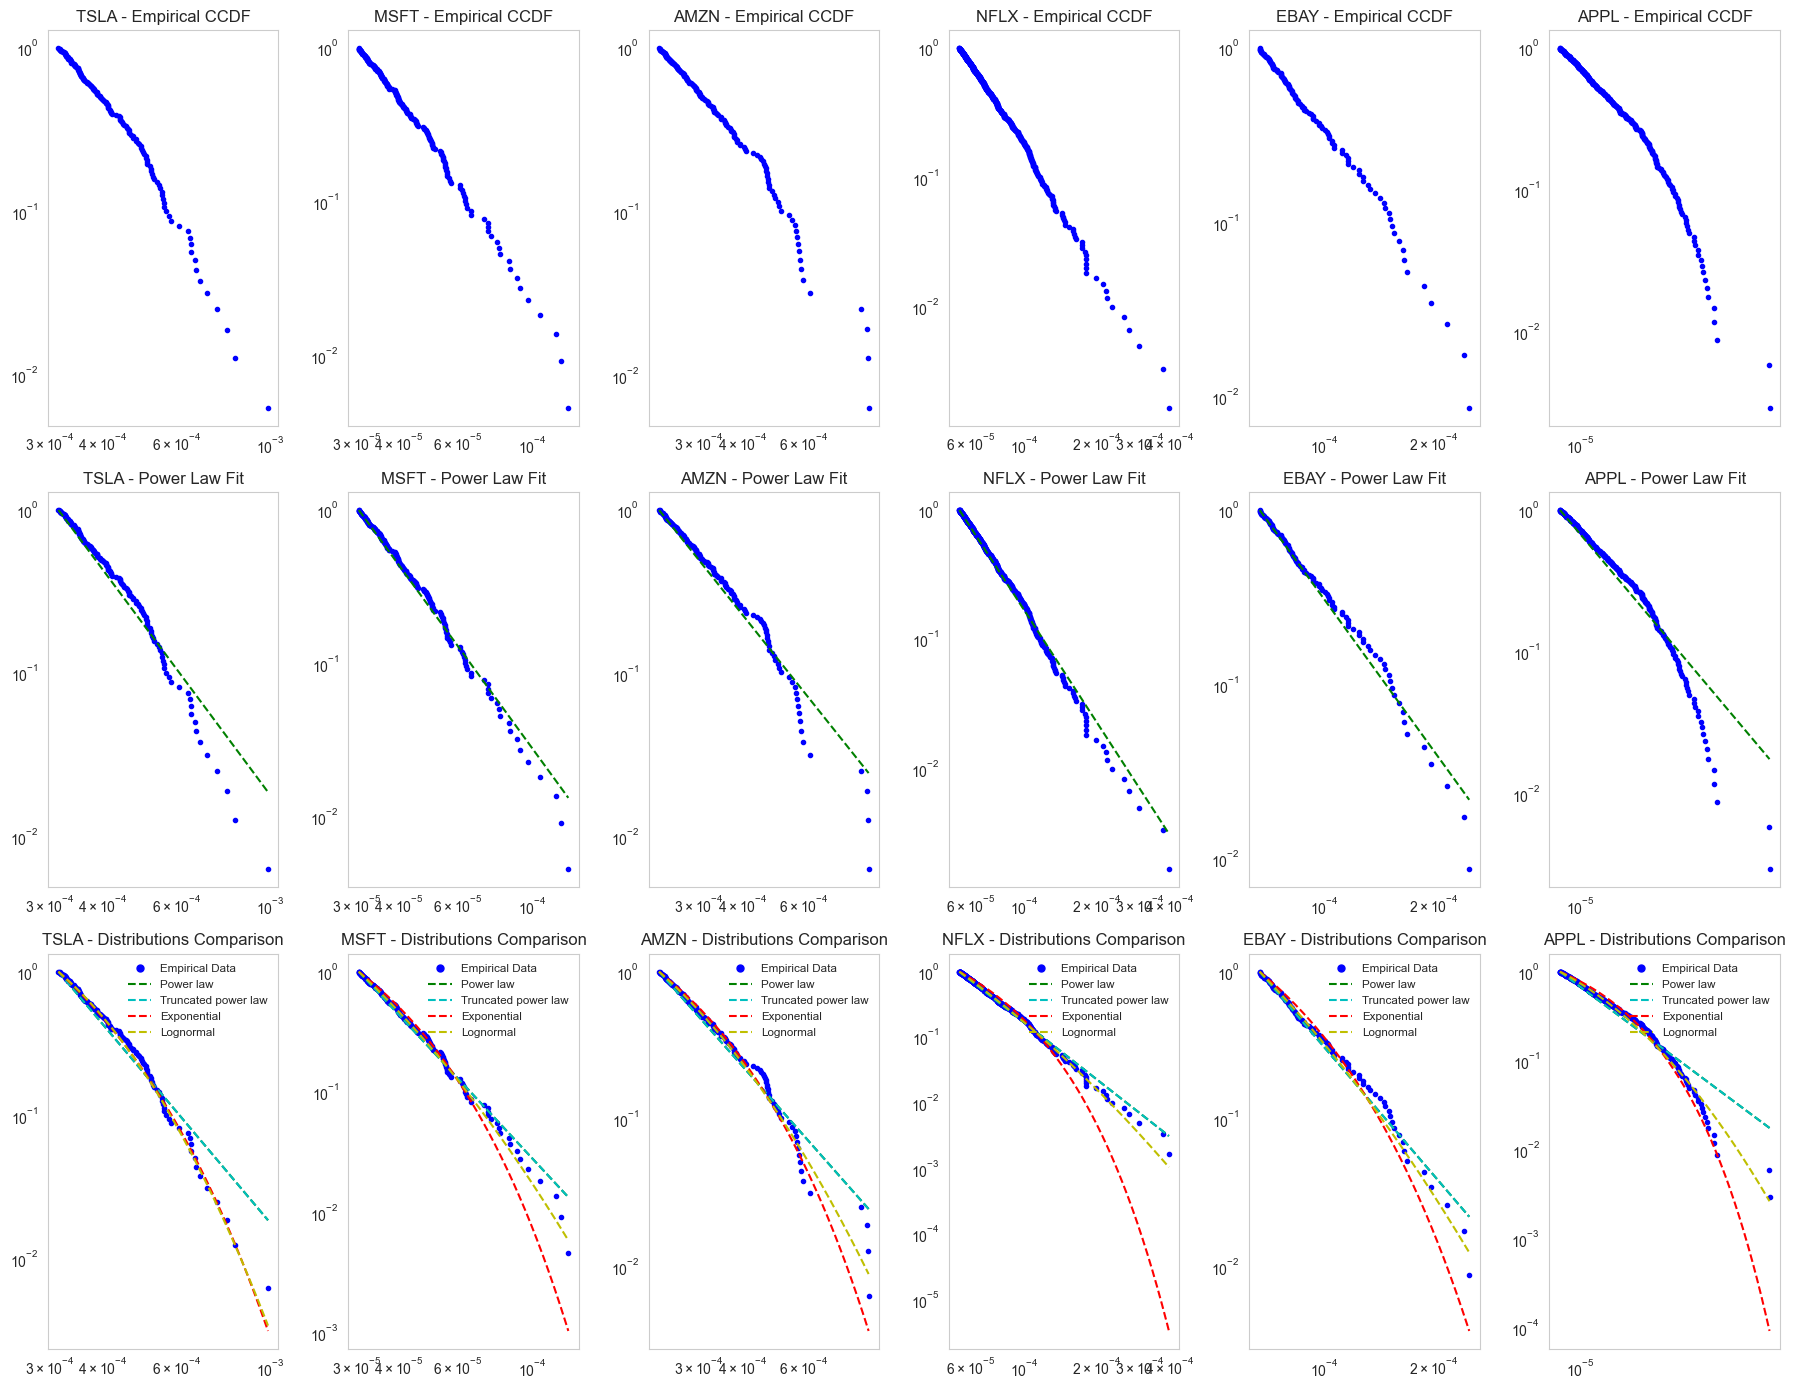

In [25]:
# Plot fitted objects
plot_fit_objects(volume_imbalance_data_fit_objects)

#### 2.2.2. Retrieve Power law fitting results

In [26]:
# Get fitting parameters for specific distribution across all stocks
volume_imbalance_fit_results = get_fitting_params(volume_imbalance_data_fit_objects, 'power_law')
print(volume_imbalance_fit_results)

  Stock Distribution     alpha      xmin  KS Distance
0  TSLA    power_law  4.477917  0.000314     0.068130
1  MSFT    power_law  3.993169  0.000030     0.053181
2  AMZN    power_law  3.662586  0.000230     0.052481
3  NFLX    power_law  3.894525  0.000054     0.025644
4  EBAY    power_law  3.893248  0.000067     0.038871
5  APPL    power_law  2.723054  0.000008     0.059075


In [27]:
# Get fitting parameters for specific distribution across all stocks
volume_imbalance_fit_results = get_fitting_params(volume_imbalance_data_fit_objects, 'truncated_power_law')
print(volume_imbalance_fit_results)

  Stock         Distribution     alpha        Lambda      xmin  KS Distance
0  TSLA  truncated_power_law  1.000000   6610.223327  0.000314     0.042882
1  MSFT  truncated_power_law  2.553386  24272.115663  0.000030     0.029982
2  AMZN  truncated_power_law  1.438787   4796.711676  0.000230     0.048497
3  NFLX  truncated_power_law  3.182558   6328.622480  0.000054     0.020361
4  EBAY  truncated_power_law  2.441678  10959.021941  0.000067     0.038281
5  APPL  truncated_power_law  1.322429  59870.445199  0.000008     0.037706


In [28]:
# Get fitting parameters for specific distribution across all stocks
exp_volume_imbalance_fit_results = get_fitting_params(volume_imbalance_data_fit_objects, 'lognormal')
print(exp_volume_imbalance_fit_results)

  Stock Distribution         Lambda      xmin  KS Distance
0  TSLA  exponential    8561.235899  0.000314     0.036639
1  MSFT  exponential   70012.414380  0.000030     0.059669
2  AMZN  exponential    8086.039725  0.000230     0.047424
3  NFLX  exponential   36934.816597  0.000054     0.077043
4  EBAY  exponential   30591.857859  0.000067     0.083769
5  APPL  exponential  122757.398853  0.000008     0.083725


In [29]:
# Average Alpha exponents across stocks
min_alpha = volume_imbalance_fit_results['alpha'].min()
max_alpha = volume_imbalance_fit_results['alpha'].max()
avg_alpha = volume_imbalance_fit_results['alpha'].mean()
std_dev_alpha = volume_imbalance_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 1.00000000000604
Max Alpha: 3.1825584011395627
Average Alpha: 1.9898064098957817
std_dev_alpha: 0.8571113073737007


#### 2.2.3. Compare alternative distributions

In [31]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
volume_imbalance_comparison = distribution_compare(volume_imbalance_data_fit_objects, 'lognormal')
display(volume_imbalance_comparison)

,Stock,Alternative Distribution,mu,sigma,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (lognormal),Loglikelihood Ratio,p-value
0,TSLA,lognormal,-8.266054,0.439855,0.000314,4.477917,0.068130,0.038873,-1.832411,0.066890
1,MSFT,lognormal,-11.792055,0.815783,0.000030,3.993169,0.053181,0.032126,-1.113654,0.265428
2,AMZN,lognormal,-8.926850,0.667506,0.000230,3.662586,0.052481,0.051989,-1.501926,0.133116
3,NFLX,lognormal,-12.518769,1.072877,0.000054,3.894525,0.025644,0.021798,-1.108911,0.267469
4,EBAY,lognormal,-11.168293,0.866994,0.000067,3.893248,0.038871,0.036105,-0.839390,0.401251
5,APPL,lognormal,-12.052384,0.856703,0.000008,2.723054,0.059075,0.044307,-2.815878,0.004864
